# 경사하강법으로 오염된 이미지 복원하기

In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

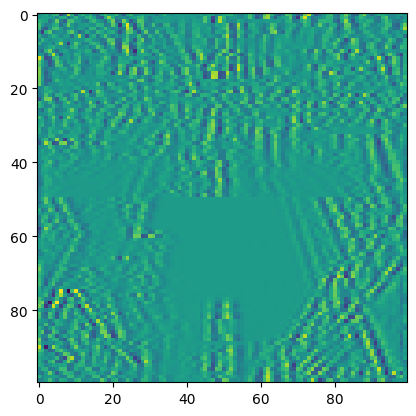

In [21]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )
plt.imshow(broken_image.view(100, 100))

In [22]:
# 이미지를 오염시키는 weird_function
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [23]:
# 가설 텐서와 오염된 이미지 사이의 오차 계산 함수
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [24]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [25]:
lr = 0.8 # learning rate

In [28]:
lr = 0.8
for i in range(0,100000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.021167906001210213
Loss at 1000 = 0.021167969331145287
Loss at 2000 = 0.021168231964111328
Loss at 3000 = 0.0211682990193367
Loss at 4000 = 0.021168408915400505
Loss at 5000 = 0.021168459206819534
Loss at 6000 = 0.021168606355786324
Loss at 7000 = 0.02116907574236393
Loss at 8000 = 0.021169112995266914
Loss at 9000 = 0.021168731153011322
Loss at 10000 = 0.021168595179915428
Loss at 11000 = 0.021168528124690056
Loss at 12000 = 0.021168671548366547
Loss at 13000 = 0.0211686659604311
Loss at 14000 = 0.02116875723004341
Loss at 15000 = 0.021168725565075874
Loss at 16000 = 0.021168800070881844
Loss at 17000 = 0.021168697625398636
Loss at 18000 = 0.021168885752558708
Loss at 19000 = 0.021168794482946396
Loss at 20000 = 0.021168624982237816
Loss at 21000 = 0.021168552339076996
Loss at 22000 = 0.021168570965528488
Loss at 23000 = 0.02116846852004528
Loss at 24000 = 0.021168699488043785
Loss at 25000 = 0.02116880565881729
Loss at 26000 = 0.021168772131204605
Loss at 27000 = 0.0211

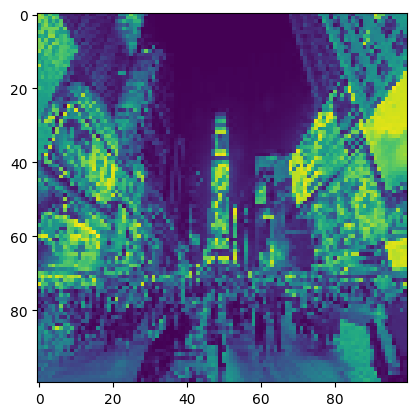

In [29]:
plt.imshow(random_tensor.view(100,100).data)